In [183]:
# Change here using YOUR own first and last names
fn1 = "daniel_andres"
ln1 = "vahos_mendoza"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [184]:
filename

'sd-tsia204_lab2_vahos_mendoza_daniel_andres.ipynb'

**FIRST POINT (1)**

In [185]:
# Importing the data
#filename = 'data_dm3.csv'

In [186]:
from google.colab import files #I have to import the csv file for reading it later
uploaded= files.upload()

Saving data_dm3.csv to data_dm3 (1).csv


In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sn
from scipy.stats import t
from scipy import stats
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [188]:
np.random.seed() #Set random seed to 0

In [189]:
filename= 'data_dm3.csv'
df = pd.read_csv(filename)

In [190]:
df

,-1.298173374733184726e+00,-1.622490637183908735e-01,1.223379369153350549e+00,1.355554339582927481e+00,1.080170627962381058e+00,6.349793274139390320e-01,2.987410831264468158e-01,5.482702692046558246e-01,7.317733641828934044e-01,1.018645435297013568e+00,-1.439785343945224616e-01,-4.005876854410100191e-02,8.428015462561156967e-01,-3.792057195330847952e-01,9.167459408013332034e-01,-2.355941149671710644e+00,-9.995237013712363616e-01,-1.107956531940136741e-01,1.712278546728345008e+00,2.884387316163388615e+00,-6.451342042487455686e-01,3.745493174011269577e+00,6.566535121068950431e-01,-3.709885362847661350e-01,9.936883474237921954e-01,-1.383538982962722486e+00,-1.018152987581038671e+00,3.876537390348712142e-01,-1.405178608840112336e-02,-3.606919925116154890e-01,-5.310133848985278959e-01,3.415852216728040847e-01,7.836277005515388527e-01,-1.248697608254120794e+00,-5.449918753626981777e-02,-3.377447595492134580e-01,-1.869382897950143896e+00,6.566575388815728553e-01,1.455274787545320428e-02,-8.582065173125195123e-01,...,1.110789606777341287e+00,-2.544858956604909572e-01,6.625260380428802387e-01,-9.124505270223775000e-01,-4.772401439508399124e-01,-1.532186911208248681e+00,-4.614406534434690177e-01,-2.525747510852910604e+00,5.683221260495160410e-01,5.206200441620645325e-01,-5.161598148970627520e-01,-4.673964713839948715e-01,1.365251036526797579e+00,2.803179414389349033e-01,1.438662294001540776e+00,-1.471489131777454329e+00,-1.292056166863262412e+00,1.184958774961809347e+00,8.991705527344731608e-02,5.210712749468803251e-01,-1.173315845335873853e+00,5.121506834853356560e-01,-3.749101653416248014e-01,4.513884559549102837e-01,-2.955964749460739394e-01,-6.962803302882102363e-01,1.517709933426957924e+00,-1.244537283448224896e+00,-2.297229244203413956e-01,9.375461820781528788e-01,5.882777992748500218e-01,2.101056224387073124e-01,1.861458271316984936e+00,-4.363994858971800839e-01,2.792989402465480553e-01,-1.416019733199122221e+00,-2.332362908037092009e+00,2.150961139501001429e-01,-6.933193671119128876e-01,1.510000000000000000e+02
0,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,1.248562,-0.527688,1.260376,0.673029,-0.507056,1.441486,0.684543,-1.427168,-0.827024,1.387451,-0.624598,-0.216404,-0.022431,-1.938479,-1.143878,-0.941538,0.587944,0.409334,-0.226553,-0.274476,-0.301681,-0.548755,0.660260,-0.292527,-0.830301,-0.024815,0.093171,0.184854,0.659346,0.023453,...,-0.413022,-0.905504,-0.775072,1.564414,-0.838463,0.342608,-0.874917,0.728367,-1.104763,-0.004731,0.665348,-2.213558,1.735811,0.063891,-0.349194,-1.191502,-0.103416,1.155222,-0.933356,0.237656,0.547982,-0.884854,-1.281770,0.677351,0.734293,-0.688901,-0.045326,1.858089,0.468615,0.940726,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
1,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,2.269739,0.521300,0.221907,0.041486,-0.360214,-0.675852,-2.107100,-0.344865,1.284206,1.483036,0.454233,1.467267,-0.216011,-0.545154,0.451173,1.071382,0.654145,-1.256757,0.659401,-2.981795,-0.399291,-0.200168,-1.284389,-0.694969,-0.054499,-0.744916,-0.153516,-0.009057,-1.076121,-0.576408,...,1.158315,-0.195460,-0.222329,-0.680245,0.449108,1.137670,1.092085,-1.793062,-1.493069,0.914259,-2.230965,1.612821,0.536945,2.220749,-0.257719,-0.213694,-0.203711,2.126828,-0.118523,-1.822842,2.315821,-0.926919,-0.946186,-0.212913,2.137168,2.038290,-0.700610,1.930568,0.674011,0.338998,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
2,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,2.316057,1.729722,-0.410363,1.030486,0.749292,-0.641629,-0.374515,0.879445,0.651940,0.740688,1.562574,0.320537,1.944994,-0.196823,0.459805,2.439480,-0.425467,-0.180575,0.757501,-0.393359,0.742157,1.148394,-0.295954,0.589195,0.721302,-0.384002,-0.098398,0.280842,1.040315,1.107964,...,-1.682714,0.413769,1.939559,-0.757647,0.540113,-

In [191]:
total_mean=df.mean()
total_mean

-1.298173374733184726e+00      0.002944
-1.622490637183908735e-01      0.000368
1.223379369153350549e+00      -0.002774
1.355554339582927481e+00      -0.003074
1.080170627962381058e+00      -0.002449
                                ...    
-1.416019733199122221e+00      0.003211
-2.332362908037092009e+00      0.005289
2.150961139501001429e-01      -0.000488
-6.933193671119128876e-01      0.001572
1.510000000000000000e+02     152.136054
Length: 211, dtype: float64

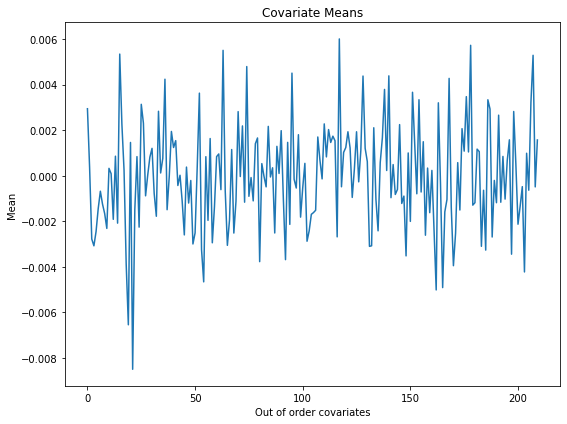

In [192]:
mean = df.mean()[:-1]
plt.subplots(1, figsize=(15, 6))

# Plotting the means
plt.subplot(121)
plt.plot(range(len(mean)), mean)
plt.title('Covariate Means')
plt.ylabel('Mean')
plt.xlabel('Out of order covariates')
plt.tight_layout()
plt.show()

In [193]:
print(f'Y with Mean: {df.mean()[-1]:.2f}')

Y with Mean: 152.14


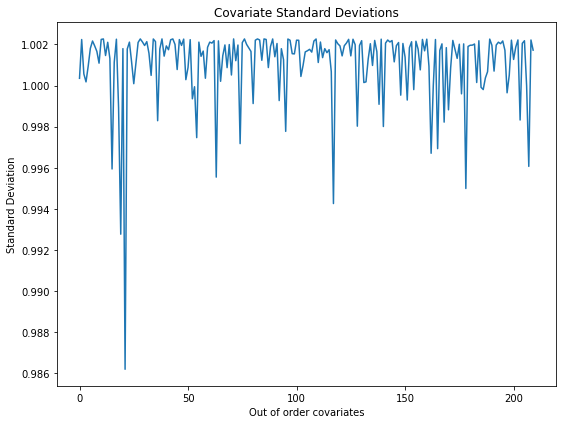

Y with Standard Deviation: 77.18


In [194]:
std = df.std()[:-1]
plt.subplots(1, figsize=(15, 6))
# Plot the standard deviations
plt.subplot(122)
plt.plot(range(len(std)), std)
plt.title('Covariate Standard Deviations')
plt.ylabel('Standard Deviation')
plt.xlabel('Out of order covariates')

plt.tight_layout()
plt.show()
print(f'Y with Standard Deviation: {df.std()[-1]:.2f}')

Separate the data frame in two matrices, X and Y , containing the input and output data
respectively.

In [195]:
# Select last column of dataframe as an object in order 
#to have the matrix Y
Y = df.iloc[: , -1:]
Y #It was said that last column belongs to Y

,1.510000000000000000e+02
0,75.0
1,141.0
2,206.0
3,135.0
4,97.0
...,...
436,178.0
437,104.0
438,132.0
439,220.0


In [196]:
# Select all columns except last one of dataframe as an object in order 
#to have the matrix Y
X = df.iloc[:, -211:-1]
X

,-1.298173374733184726e+00,-1.622490637183908735e-01,1.223379369153350549e+00,1.355554339582927481e+00,1.080170627962381058e+00,6.349793274139390320e-01,2.987410831264468158e-01,5.482702692046558246e-01,7.317733641828934044e-01,1.018645435297013568e+00,-1.439785343945224616e-01,-4.005876854410100191e-02,8.428015462561156967e-01,-3.792057195330847952e-01,9.167459408013332034e-01,-2.355941149671710644e+00,-9.995237013712363616e-01,-1.107956531940136741e-01,1.712278546728345008e+00,2.884387316163388615e+00,-6.451342042487455686e-01,3.745493174011269577e+00,6.566535121068950431e-01,-3.709885362847661350e-01,9.936883474237921954e-01,-1.383538982962722486e+00,-1.018152987581038671e+00,3.876537390348712142e-01,-1.405178608840112336e-02,-3.606919925116154890e-01,-5.310133848985278959e-01,3.415852216728040847e-01,7.836277005515388527e-01,-1.248697608254120794e+00,-5.449918753626981777e-02,-3.377447595492134580e-01,-1.869382897950143896e+00,6.566575388815728553e-01,1.455274787545320428e-02,-8.582065173125195123e-01,...,1.740494404292788566e+00,1.110789606777341287e+00,-2.544858956604909572e-01,6.625260380428802387e-01,-9.124505270223775000e-01,-4.772401439508399124e-01,-1.532186911208248681e+00,-4.614406534434690177e-01,-2.525747510852910604e+00,5.683221260495160410e-01,5.206200441620645325e-01,-5.161598148970627520e-01,-4.673964713839948715e-01,1.365251036526797579e+00,2.803179414389349033e-01,1.438662294001540776e+00,-1.471489131777454329e+00,-1.292056166863262412e+00,1.184958774961809347e+00,8.991705527344731608e-02,5.210712749468803251e-01,-1.173315845335873853e+00,5.121506834853356560e-01,-3.749101653416248014e-01,4.513884559549102837e-01,-2.955964749460739394e-01,-6.962803302882102363e-01,1.517709933426957924e+00,-1.244537283448224896e+00,-2.297229244203413956e-01,9.375461820781528788e-01,5.882777992748500218e-01,2.101056224387073124e-01,1.861458271316984936e+00,-4.363994858971800839e-01,2.792989402465480553e-01,-1.416019733199122221e+00,-2.332362908037092009e+00,2.150961139501001429e-01,-6.933193671119128876e-01
0,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,1.248562,-0.527688,1.260376,0.673029,-0.507056,1.441486,0.684543,-1.427168,-0.827024,1.387451,-0.624598,-0.216404,-0.022431,-1.938479,-1.143878,-0.941538,0.587944,0.409334,-0.226553,-0.274476,-0.301681,-0.548755,0.660260,-0.292527,-0.830301,-0.024815,0.093171,0.184854,0.659346,0.023453,...,0.015812,-0.413022,-0.905504,-0.775072,1.564414,-0.838463,0.342608,-0.874917,0.728367,-1.104763,-0.004731,0.665348,-2.213558,1.735811,0.063891,-0.349194,-1.191502,-0.103416,1.155222,-0.933356,0.237656,0.547982,-0.884854,-1.281770,0.677351,0.734293,-0.688901,-0.045326,1.858089,0.468615,0.940726,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993
1,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,2.269739,0.521300,0.221907,0.041486,-0.360214,-0.675852,-2.107100,-0.344865,1.284206,1.483036,0.454233,1.467267,-0.216011,-0.545154,0.451173,1.071382,0.654145,-1.256757,0.659401,-2.981795,-0.399291,-0.200168,-1.284389,-0.694969,-0.054499,-0.744916,-0.153516,-0.009057,-1.076121,-0.576408,...,-0.069715,1.158315,-0.195460,-0.222329,-0.680245,0.449108,1.137670,1.092085,-1.793062,-1.493069,0.914259,-2.230965,1.612821,0.536945,2.220749,-0.257719,-0.213694,-0.203711,2.126828,-0.118523,-1.822842,2.315821,-0.926919,-0.946186,-0.212913,2.137168,2.038290,-0.700610,1.930568,0.674011,0.338998,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588
2,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,2.316057,1.729722,-0.410363,1.030486,0.749292,-0.641629,-0.374515,0.879445,0.651940,0.740688,1.562574,0.320537,1.944994,-0.196823,0.459805,2.439480,-0.425467,-0.180575,0.757501,-0.393359,0.742157,1.148394,-0.295954,0.589195,0.721302,-0.384002,-0.098398,0.280842,1.040315,1.107964,...,-0.431021,-1.682714,0.413769,1.939559,-0

**Separate the covariate data in *train* and *test sets*.** \\
**Save one fourth of the data as testing.**

If we want to save one fourth of the data as testing we have to assign the  \
$$ test\_size= 1/4 = 0.25 $$

***sklearn.model_selection.train_test_split**(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)*

In [197]:
# Separating our dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True,random_state=0)


 **Center and standardize the train and test data and plot its mean and variance again. Use the
functions fit_transform and transform.** 

There are some methods that penilize according to the magnitude of the coefficient. So according to that, it's very important to scale variables to have a fair analysis.

In [198]:
from sklearn import preprocessing
# Center and standarize the train and test covariates
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

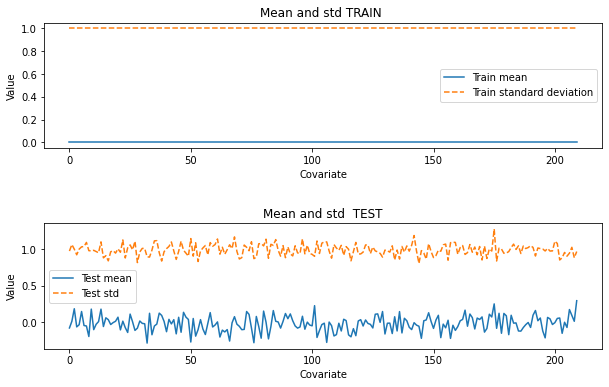

In [199]:
#Calculating the means and standard deviations

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

##TRAIN straight and TEST irregular
xmean_train= X_train.mean(0)
xmean_test= X_test.mean(0)

xstd_train= X_train.std(0)
xstd_test= X_test.std(0)

####FOR TRAIN

ax1.plot(xmean_train, label="Train mean")
ax1.plot(xstd_train, label="Train standard deviation", ls='--')
ax1.legend()
ax1.set_xlabel('Covariate')
ax1.set_ylabel('Value')
ax1.set_title('Mean and std' +
' TRAIN ')

fig.subplots_adjust(hspace=0.6) #space between both graphs

##FOR TEST
ax2.plot(xmean_test, label="Test mean")
ax2.plot(xstd_test, label="Test std", ls='--')
ax2.legend()
ax2.set_xlabel('Covariate')
ax2.set_ylabel('Value')
ax2.set_title('Mean and std ' +
              ' TEST')

plt.show()


It's good to analyze that if we zoom the Means, we're going to find an irregular behaviour. \\
Like in the previous graph. 

**Create two empty dataFrames of names *df_test* and *df_coef***

In [200]:
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

**SECOND POINT**

**Write a function to compute the determination coefficient and another to compute the mean squared
error.**

In [201]:
#Determination Coefficient
def Det_coef(Y_test, Y_pr):
    RSS = ((Y_test-Y_pr)**2).sum()   # Residual Sum of Squares 
    TSS = ((Y_test-Y_test.mean())**2).sum() # Total Sum of Squares
    det_coef = 1 - RSS/TSS # Determination Coefficient
    return float(det_coef)


#Mean Squared Errors
def MSE(Y_test, Y_pr):
    mse = ((Y_pr-Y_test)**2).mean(axis=0)[0]
    return mse

**THIRD POINT (3)**

**Using sklearn utilities, fit a linear regression model on the train set that we will use as baseline.**

*   apply the linear regression of the sklearn library to the train data
*   print the determination coefficient and the MSE of the test data,
* add a column named OLS to the df_test dataframe that contains the predicted values for the
sample and
* add a column named OLS to the df_coef dataframe that contains the estimated coefficients.

In [202]:
res= pd.DataFrame()
# Creates a model with the training data
reg_model = LinearRegression()            # Creates the model
reg_model = reg_model.fit(X_train, Y_train)   # Trains the model

# Predicts Y_test using the model and X_test as input
Y_pr = reg_model.predict(X_test)

# Adds column OLS to df_test with the predicted values
df_test['OLS'] = Y_pr.flatten()

# Adds column OLS to df_coef with the estimated coefficients
df_coef['OLS'] = reg_model.coef_.flatten()

# Obtains the R^2 and the mse of the test data
r2 = Det_coef(Y_test, Y_pr)
mse = MSE(Y_test, Y_pr)

print(f"With OLS it's gotten :R^2-Det_coef ={float(r2):.4f} and MSE={mse:.4f}")

With OLS it's gotten :R^2-Det_coef =0.2008 and MSE=4735.4827


In [203]:

from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, Y_pr)) #Computing the mean squared error

4735.482675616374


**FOURTH POINT (4)**

**4) Plot a heatmap of the covariance matrix. Compute the singular value decomposition of the covari-
ance matrix. For consistency in the notation use U, s, V “ SV DpX J Xq**

In [204]:
# Computing covariance matrix
covar_matrix = np.cov(X_train.T)

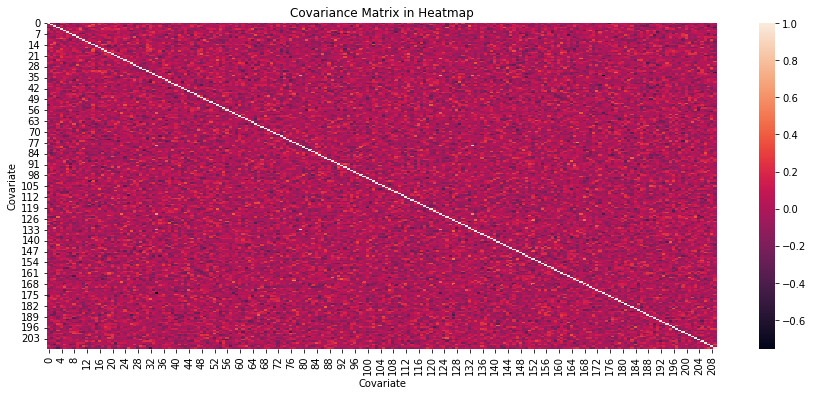

In [205]:
# Plot covariance matrix with heatmap
plt.figure(figsize=(15, 6))
sn.heatmap(covar_matrix)
plt.title('Covariance Matrix in Heatmap')
plt.xlabel('Covariate')
plt.ylabel('Covariate')
plt.show()

In [206]:
# Computing Singular Value Decomposition (SVD)
U, s, V = np.linalg.svd(covar_matrix)

**FIFTH POINT (5)**

**5) Show that the i-th singular value of $X$, $σ$ i , and the i-th eigenvalue of the covariance matrix $(n-1)^1X^TX,λ_i$ are related as follows $λ_i = (n-1)^{-1}σ^2_i$**

If it's performed singular value decomposition of X, we obtain a decomposition \\
$$X=USV^⊤$$
$$VSU^⊤USV^⊤/(n−1)=V*S^2/(n−1) * V⊤$$

Right singular vectors V are principal directions and singular values are related to the eigenvalues of covariance matrix

**SIXTH POINT (6)**

**6) In PCA we transform the data to a new coordinate system such that the greatest variance by some
scalar projection of the data lies on the first coordinate (called the first principal component, PC1),
the second greatest variance in the second PC and so on. The PCs are computed given the above
SVD, as XU . Instead of using the whole transformation, XU , we will use (as an approximation)
the first 2 PCs, i.e., the first 2 columns in XU . Which is the variance explained by each component?
Plot the projection of the data into the 1st and 2nd components.**

(330, 210)


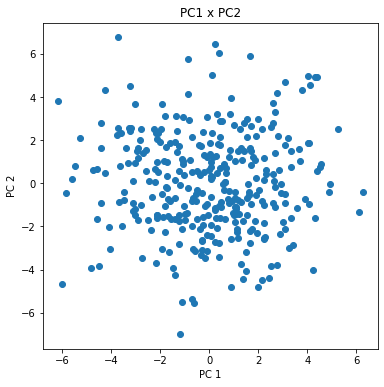

In [207]:
PCA = np.dot(X_train, U) #We have to multiply X and U according to
#the statement given on the exercise
print(PCA.shape)
plt.figure(figsize=(6, 6))
plt.scatter(PCA[:, 0], PCA[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PC1 x PC2")
plt.show()

**SEVENTH POINT (7)**

**7) In a biplot (as the one in the slides) we find the projected sample (as in the previous question)
and the loadings of the variables (as arrows from the center). They are defined as the product of
the singular vectors U and the square root of the singular values. Explain what the loadings are in
terms of the variance and plot them for the 1st and 2nd directions.**

In [208]:
rowx, colx=X.shape

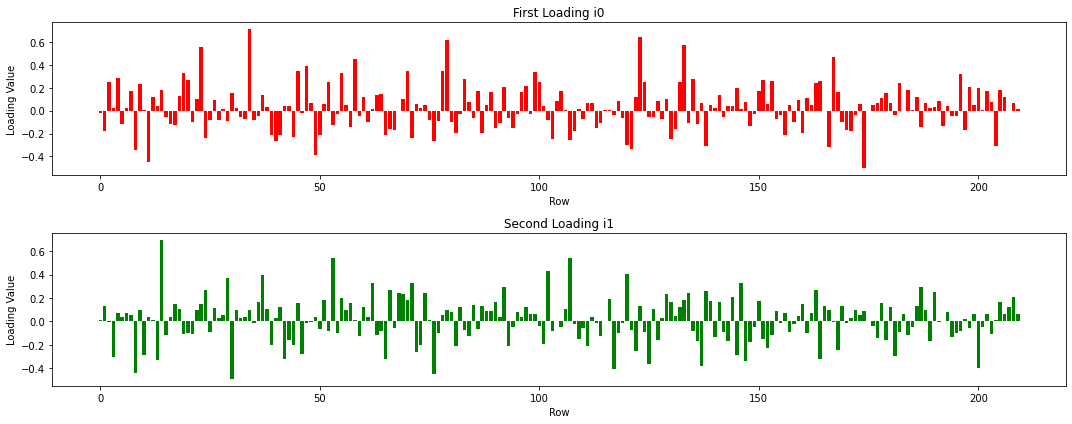

In [209]:
# Plotting PCA loadings
plt.subplots(2, 1, figsize=(15, 6))
#Plot for the first loading
plt.subplot(211)
plt.bar(range(np.shape(U[:, 0])[0]), U[:, 0]*s[0]**1/2, color='r')
plt.xlabel('Row')
plt.ylabel('Loading Value')
plt.title('First Loading i0')

#Plot for the second loading
plt.subplot(212)
plt.bar(range(np.shape(U[:, 1])[0]), U[:, 1]*s[1]**1/2, color = 'g')
plt.xlabel('Row')
plt.ylabel('Loading Value')
plt.title('Second Loading i1')

plt.tight_layout()
plt.show()


**EIGHT POINT (8)**

**8) We will apply the method "PCA before OLS", which consists in applying OLS with output Y and
input X ¨ U r:, 60s, where U r:, 60s contains the eigenvectors (associated with the 2 largest eigenvalues)
of the covariance matrix. Run linear regression as follows:**

* Compute projected data for both the train and the test data,
* apply the linear regression of the sklearn library to the low dimensional data,
* print the determination coefficient and the MSE of the test data and
* add a column named pca_ols to the df_test dataframe that contains the predicted values
for the test sample.

In [210]:
# Computing projected data for train data and test data
X_train_pca = X_train @ U[:, :60]
X_test_pca = X_test @ U[:, :60]

# Linear regression model with the projected training data
model = LinearRegression()                
model = model.fit(X_train_pca, Y_train) 

Y_pr = model.predict(X_test_pca) # Predicts Y test
r2 = Det_coef(Y_test, Y_pr)# Obtains the R^2 or determinant coefficient
mse = MSE(Y_test, Y_pr)  # Obtains the mse of the test data

# Adds the results to df_results NOOOOOOOOOOOO
res = pd.concat([res, pd.DataFrame(
    {'method': ["pca_ols"], 'R2': [r2], 'MSE': [mse]})], ignore_index=True)


print(f"In projected test : R^2={r2:.4f} and MSE ={mse:.4f}") #Prints results

# Add a column named pca_ols to the df_test dataframe that contains the predicted values
df_test['pca_ols'] = Y_pr.flatten()

In projected test : R^2=0.4143 and MSE =3470.4492


# **REGULARIZATION**

**NINTH POINT (9)**

**9) Using sklearn utilities, fit a Lasso model on the train set.**

* apply the LassoCV of the sklearn library: it uses cross-validation internally for different values
of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a
log scale beteween 1e ´ 3 and 1e1 (see function np.logspace)
* print the determination coefficient and the MSE of the test data,
* print the regulatization parameter that the algorithm selects,
* add a column named lasso to the df_test dataframe that contains the predicted values for
the sample and
* add a column named lasso to the df_coef dataframe that contains the estimated coefficients.

In [211]:
# Importing and fitting the Lasso
alphas = np.logspace(np.log10(1e-3), np.log10(1e1), num=30)
lasso_m = LassoCV(alphas=alphas).fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [212]:
# Saving useful values
df_test.loc[:, 'Lasso'] = lasso_m.predict(X_test)
df_coef.loc[:, 'Lasso'] = lasso_m.coef_

In [213]:
# Saving useful values
df_test.loc[:, 'Lasso'] = lasso_m.predict(X_test)
df_coef.loc[:, 'Lasso'] = lasso_m.coef_

In [214]:
Y_pr = lasso_m.predict(X_test).reshape(-1, 1)

In [215]:
# Obtaining and printing R2 and MSE
dc = Det_coef(Y_test, Y_pr)
#dc = Det_coef(Y_test, np.array(df_test.loc[:, 'lasso']))
mse_lasso = MSE(Y_test, Y_pr)
print(f'The determination coefficient obtained was: {dc:.3f}')
print(f'The mean squared error obtained was: {mse_lasso:.3f}')

The determination coefficient obtained was: 0.515
The mean squared error obtained was: 2872.820


**TENTH POINT (10)**

**10) Using sklearn utilities, fit a Ridge model on the train set.**

* apply the RidgeCV of the sklearn library: it uses crossvalidation internally for different values
of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a
log scale beteween 1e ´ 1 and 10e2 (see function np.logspace).
* print the determination coefficient and the MSE of the test data,
* print the regulatization parameter that the algorithm selects,
* add a column named Ridge to the df_test dataframe that contains the predicted values for
the sample and
* add a column named Ridge to the df_coef dataframe that contains the estimated coefficients.

In [216]:
# Importing and fitting the ridge
alphas = np.logspace(np.log10(1e-1), np.log10(10e2), num=30)
ridge = RidgeCV(alphas=alphas).fit(X_train, Y_train)

In [217]:

Y_pr = ridge.predict(X_test).reshape(-1, 1)

# Adds column Ridge with the predicted values
df_test['Ridge'] = Y_pr.flatten()

# Adds column Ridge with the coefficients
df_coef['Ridge'] = ridge.coef_.flatten()

In [218]:
# Obtains the R^2 and the mse of the test data
r2 = Det_coef(Y_test, Y_pr)
mse = MSE(Y_test, Y_pr)

print(f"For the test data using Ridge we have: R^2={r2:.5f} and MSE={mse:.5f}")
print(f"The chosen alpha was: {ridge.alpha_:.5f}")

For the test data using Ridge we have: R^2=0.43021 and MSE=3376.30899
The chosen alpha was: 57.36153


# **VARIABLE SELECTION**

**ELEVENTH POINT (11)**

**11) Program the method of the forward variable selection. You can use the test statistics of the test
for nullity (as seen during the course). For the moment, do not define the stop criterion for the
method, i.e. add a variables at each time until all the variables are used. Provide the order of the
variable selection.**

In [219]:
def FVS(X, r): # r is equivalent to Y
    list_variables = []
    for j in range(X.shape[1]):
        K_list = []
        T = []
        for i in range(X.shape[1]):
            if(i not in list_variables):
                mod_ols = LinearRegression(fit_intercept=True)
                regression_coef = mod_ols.fit(X[:, i].reshape(-1, 1), r).coef_

                i_regression = mod_ols.fit(X[:, i].reshape(-1, 1), r).intercept_
                k = np.array([i_regression, regression_coef[0]])
                K_list.append(k)
                # Computing the Gram Matrix
                matrix_Gram = np.matmul(np.c_[np.ones(X.shape[0]), X[:, i]].T,np.c_[np.ones(X.shape[0]),X[:, i]]) / X.shape[0]
                # Computing the noise
                noise = np.linalg.norm(r - np.matmul(np.c_[np.ones(X.shape[0]),X[:, i]], k),ord=2)**2 / (X.shape[0]-2)
                #Computing s
                s = np.dot(np.dot(np.array([0, 1]).T,np.linalg.inv(matrix_Gram)), np.array([0, 1]))
                #T
                t = np.sqrt(X.shape[0]) * \
                    np.linalg.norm(k, ord=1)/np.sqrt(noise * s)
    
                T.append(float(t))
            else: #If it's not in the shape of X
                T.append(0) #Don't add anything
                K_list.append(np.array([0, 0]))
        #Finally we got the results
        taken_var = T.index(max(T)) ##the taken value is with the maximum T!
        list_variables.append(taken_var) ##we add the new taken variable to the result list
        r -= np.matmul(np.c_[np.ones(X.shape[0]), X[:, taken_var]], K_list[taken_var])
    return list_variables

In [220]:
taken_list = FVS(X_train, Y_train)
print("Order of variable selection", taken_list)

Order of variable selection [58, 123, 167, 133, 130, 31, 5, 13, 45, 24, 135, 34, 40, 47, 85, 43, 19, 94, 132, 180, 112, 200, 209, 33, 153, 56, 208, 183, 143, 36, 8, 86, 99, 204, 48, 26, 59, 137, 168, 181, 27, 138, 174, 79, 202, 23, 95, 150, 115, 148, 89, 161, 57, 77, 131, 0, 179, 67, 163, 11, 175, 191, 113, 184, 55, 97, 126, 71, 63, 39, 14, 84, 164, 88, 9, 12, 134, 114, 203, 64, 68, 75, 189, 110, 81, 50, 52, 129, 60, 2, 7, 74, 193, 122, 28, 205, 25, 139, 190, 106, 20, 87, 91, 15, 76, 66, 17, 177, 96, 118, 173, 162, 29, 72, 46, 169, 18, 186, 155, 70, 80, 51, 127, 83, 62, 44, 171, 201, 156, 187, 37, 111, 188, 144, 42, 194, 141, 207, 120, 128, 53, 206, 158, 32, 107, 92, 101, 65, 35, 100, 119, 145, 196, 146, 142, 136, 82, 1, 147, 6, 30, 199, 3, 125, 195, 197, 176, 22, 105, 38, 170, 185, 73, 166, 140, 159, 160, 90, 108, 4, 172, 178, 93, 78, 149, 54, 117, 49, 69, 182, 104, 192, 121, 16, 41, 61, 151, 165, 21, 102, 157, 152, 154, 103, 124, 109, 198, 116, 98, 10]


In [221]:
df_coef

,OLS,Lasso,Ridge
0,-7.585631e+13,0.0,0.305749
1,-1.039328e+15,-0.0,-0.499280
2,-6.605238e+15,0.0,0.779109
3,3.048831e+15,0.0,0.145462
4,4.409982e+14,-0.0,-0.571878
...,...,...,...
205,1.459648e+15,-0.0,-0.574997
206,3.048558e+15,-0.0,-0.951848
207,-1.745639e+15,0.0,0.051091
208,-5.466357e+13,0.0,1.515438


**TWELFTH POINT (12)**

**12) Stop criterion: We choose to stop if the p-value is larger than 0.05. Illustrate the method providing
(i) the 3 graphs of the test statistics obtained when selecting the 1st, 2nd and 3rd variables (in
abscissa: the indices of the variables; in the ordinate: the value of the test statics), (ii) the graphs of
the first 50 p-values (each associated to a selected variable). On the same plot, trace the horizontal
line with the ordinate 0.05. Finally, provide the list of the selected variables.**

In [222]:
def FVS_with_stopcrit(X, r):
    fig, (im1, im2) = plt.subplots(2, 1, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.8)
    ls = ['-', '-.', 'dotted']

    list_variables = [] #here we're going to stock the taken variables (result)
    list_p = [] #this is the list of values p
    for n in range(X.shape[1]):# this is the cycle for analyzing all variables
        T = []
        K_list = []
        for i in range(X.shape[1]):#another cycle to analyze and find the ones of minimum value p
            if(i not in list_variables):
                # Covariates
                mod_ols = LinearRegression(fit_intercept=True)
                regression_coef = mod_ols.fit(X[:, i].reshape(-1, 1), r).coef_
                i_regression = mod_ols.fit(X[:, i].reshape(-1, 1), r).intercept_
                k = np.array([i_regression, regression_coef[0]])
                K_list.append(k)
                # Computing Gram Matrix
                matrix_Gram = np.matmul(np.c_[np.ones(X.shape[0]), X[:, i]].T,np.c_[np.ones(X.shape[0]),X[:, i]]) / X.shape[0]
                # Computing the noise
                noise = np.linalg.norm(r - np.matmul(np.c_[np.ones(X.shape[0]),X[:, i]], k),ord=2)**2 / (X.shape[0]-2)
                #Computing s
                s = np.dot(np.dot(np.array([0, 1]).T,np.linalg.inv(matrix_Gram)), np.array([0, 1]))
                #T
                t = np.sqrt(X.shape[0]) * \
                    np.linalg.norm(k, ord=1)/np.sqrt(noise * s)
                T.append(float(t))
            else:
                T.append(0)
                K_list.append(np.array([0, 0]))
        taken_var = T.index(max(T))#we find the taken variable with maximum T

        p = 2*(1-stats.norm.cdf(max(T)))#computing value p
        list_p.append(p) #save value p in its respective list
        if(p < 0.05):# If p<0.05 do it!
            list_variables.append(taken_var)
            if(n < 50):#first 50 values
                im2.scatter(n, p, c='g')# We plot
        else:# If p>0.05 don't do it!
            if(n < 50):#first 50 values
                im2.scatter(n, p, c='b')#We plot
        r -= np.matmul(np.c_[np.ones(X.shape[0]), X[:, taken_var]], K_list[taken_var])#making it as residual

  ##Here it's guaranteed to show just the 3 first steps, no more
        if(n < 3):
            cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
            im1.plot(T, label="step " + str(n + 1), color=cycle[n], ls=ls[n])
            im1.plot(taken_var, T[taken_var], 'o', color=cycle[n])
            im1.annotate(str(taken_var), (taken_var + 1, T[taken_var] + 0.5))
            im1.legend(loc=1, fontsize="large")
            im1.set_title('3 first steps values')
            im1.set_xlabel('Covariates')
            im1.set_ylabel('Values of test statics')
    # Making the second graph beautiful
    im2.axhline(y=0.05, c='b', label="0.05")
    im2.set_title('P values')
    im2.set_ylabel('Ps')
    im2.set_xlabel('Steps')
    im2.legend(loc=2, fontsize="large")
    plt.show()
    return list_variables

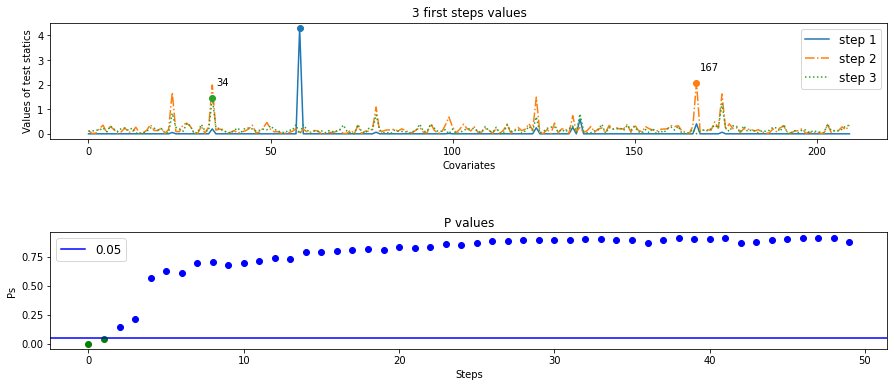

Variables with stop criterim  [58, 167]


In [223]:
result_with_stop = FVS_with_stopcrit(X_train, Y_train)
print("Variables with stop criterim ", result_with_stop)

**THIRTEENTH POINT (13)**

**13) Run OLS on the selected variables**

* apply the OLS of the sklearn library
* print the determination coefficient and the MSE of the test data
* add a column named FVS to the df_test dataframe that contains the predicted values for the
sample and
* add a column named FVS to the df_coef dataframe that contains the estimated coefficients.

In [232]:
# Creates train and test matrices with the selected covariates
X_train_selected = X_train[:, result_with_stop]
X_test_selected = X_test[:, result_with_stop]

# Creates a model with the selected training data
model = LinearRegression()              
model = model.fit(X_train_selected, Y_train) 
Y_test_pred = model.predict(X_test_selected)

# Adds column Ridge to df_test with the predicted values
df_test['FVS'] = Y_test_pred.flatten()

# Adds column Ridge to df_coef with the estimated coefficients
coefs = model.coef_.flatten().tolist()
df_coef['FVS'] = [
    coefs.pop(0) if i in result_with_stop else 0 for i in range(X_train.shape[1])]

# Obtains the R^2 and the mse of the test data
r2 = Det_coef(Y_test, Y_test_pred)
mse = MSE(Y_test, Y_test_pred)

print(
    f"For selected covariates: R^2={r2:.4f} and MSE={mse:.4f}")

For selected covariates: R^2=-3.7987 and MSE=28434.9238


# **COMPARISON**

**FOURTEENTH POINT (14)**

**14) Summarize the results of all the methods: Compare the values of the coefficients from the different
methods by plotting df_coef. Avoid using lines (i.e., use only markers) for a better interpretability
of the plot.**

In [228]:
df_coef

,OLS,Lasso,Ridge,FVS
0,-7.585631e+13,0.0,0.305749,0.0
1,-1.039328e+15,-0.0,-0.499280,0.0
2,-6.605238e+15,0.0,0.779109,0.0
3,3.048831e+15,0.0,0.145462,0.0
4,4.409982e+14,-0.0,-0.571878,0.0
...,...,...,...,...
205,1.459648e+15,-0.0,-0.574997,0.0
206,3.048558e+15,-0.0,-0.951848,0.0
207,-1.745639e+15,0.0,0.051091,0.0
208,-5.466357e+13,0.0,1.515438,0.0


**FIFTEENTH POINT (15)**

**15) How many coefficients are set exactly to zero by each of the methods considered in the data frame
df_coef? (That is: OLS, Lasso, Ridge and FVS but not PCA before OLS). Why is the number of
coefficients set to 0 so different for Lasso and Ridge?**

As is well known, the main objective of Lasso is very used when there are a large number of parameters that have no relevance, and therefore, the objective is that many of them have their coefficients at 0, so that they are omitted. In other words Lasso's objective is to select the most important features and keep only them to simplify the model. Unlike Ridge, which always aims to generate a constraint with all the parameters involved. 

In [230]:
# num of coef equal to zero = num of coef- num of coef!=0
print("Number of coefficients to zero:\n")
for i in df_coef:
    n_zeros = df_coef[i].size - np.count_nonzero(df_coef[i])
    print("  - ", i, ": ", n_zeros, "coefficients IN zero")

Number of coefficients to zero:

  -  OLS :  0 coefficients IN zero
  -  Lasso :  204 coefficients IN zero
  -  Ridge :  0 coefficients IN zero
  -  FVS :  208 coefficients IN zero


**SIXTEENTH POINT (16)**

**16) Give a pairplot of the *df_test* dataframe. Let the fitted coefficient of the previous problems be $θ̂^{rd}$
for the ridge, $θ̂^{ols}$ for the OLS, $θ̂^{pca}$ for the PCA before OLS, $θ̂^{ls}$ for the lasso. Specify the equation
to predict the value of a new, unseen data point $x$.**

$ $

OLS: $$Y = X\widehat{\theta}^{ols}$$

PCA: 

$$Y = XU_K\widehat{\theta}^{pca}$$
Being $U_k$ the singular matrix associated to the $k $ largest singular eigen values of the covariance matrix.

Ridge: $$Y = X\widehat{\theta}^{rd}$$

Lasso:

$$Y = X\widehat{\theta}^{ls}$$

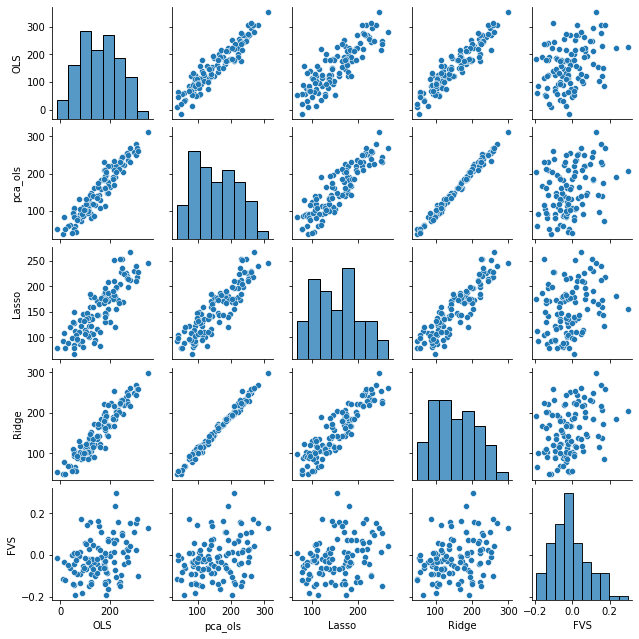

In [231]:
# Plotting pairplot graph for all methods
sn.pairplot(df_test, height=1.8)
plt.show()

As it can be seen, the diagonal corresponds to the distribution of each method, because both methods (from the vertical axis and horizontal axis are the same), but the other graphs show the comparion between the methods refereed in x and y axis. 